Escreva um programa dado que $Y = a \cdot X^{2} + b$, obtenha o histograma de $f(Y)$, sendo que $X$ é uma variável aleatória uniformemente distribuída entre 0 e 1. Teste o programa para as combinações de $a = 0, 0.5, 1, 2$ e $b = -1, 0, 1, 2, 4$ e compare os resultados com os respectivos $f(Y)$ teóricos.

Analise como se comportam $E[X], E[Y], E[X^2], E[Y^2], Var(X), Var(Y), σ(X), σ(Y), Corr(X, Y)$, e $ρ(X, Y)$ em função dos valores de $a$ e $b$. Utilize ao menos 1000 amostras para $X$.

## Solução

### Parte 1) Obtenção dos histogramas de $f(Y)$

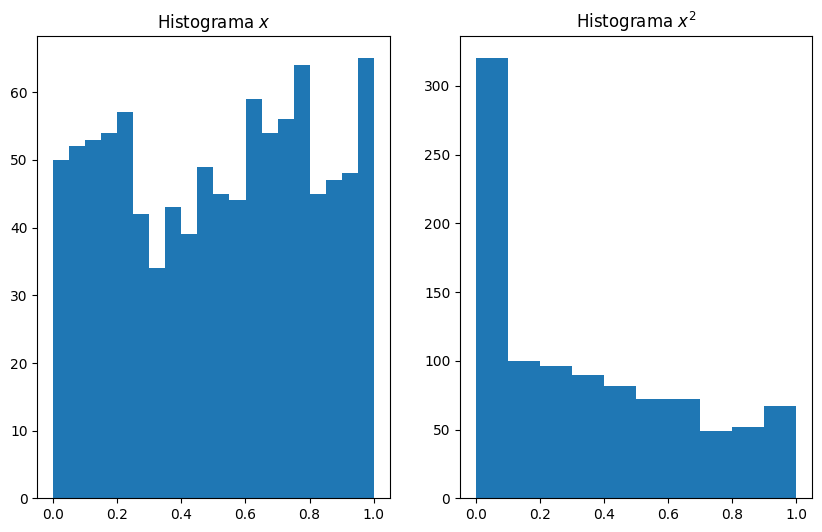

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

size=1000

x = stats.uniform.rvs(loc=0, scale=1, size=size, random_state=None)
x_2 = x**2

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].hist(x, bins=20)
ax[0].set_title('Histograma $x$')
ax[1].hist(x_2)
ax[1].set_title('Histograma $x^2$');


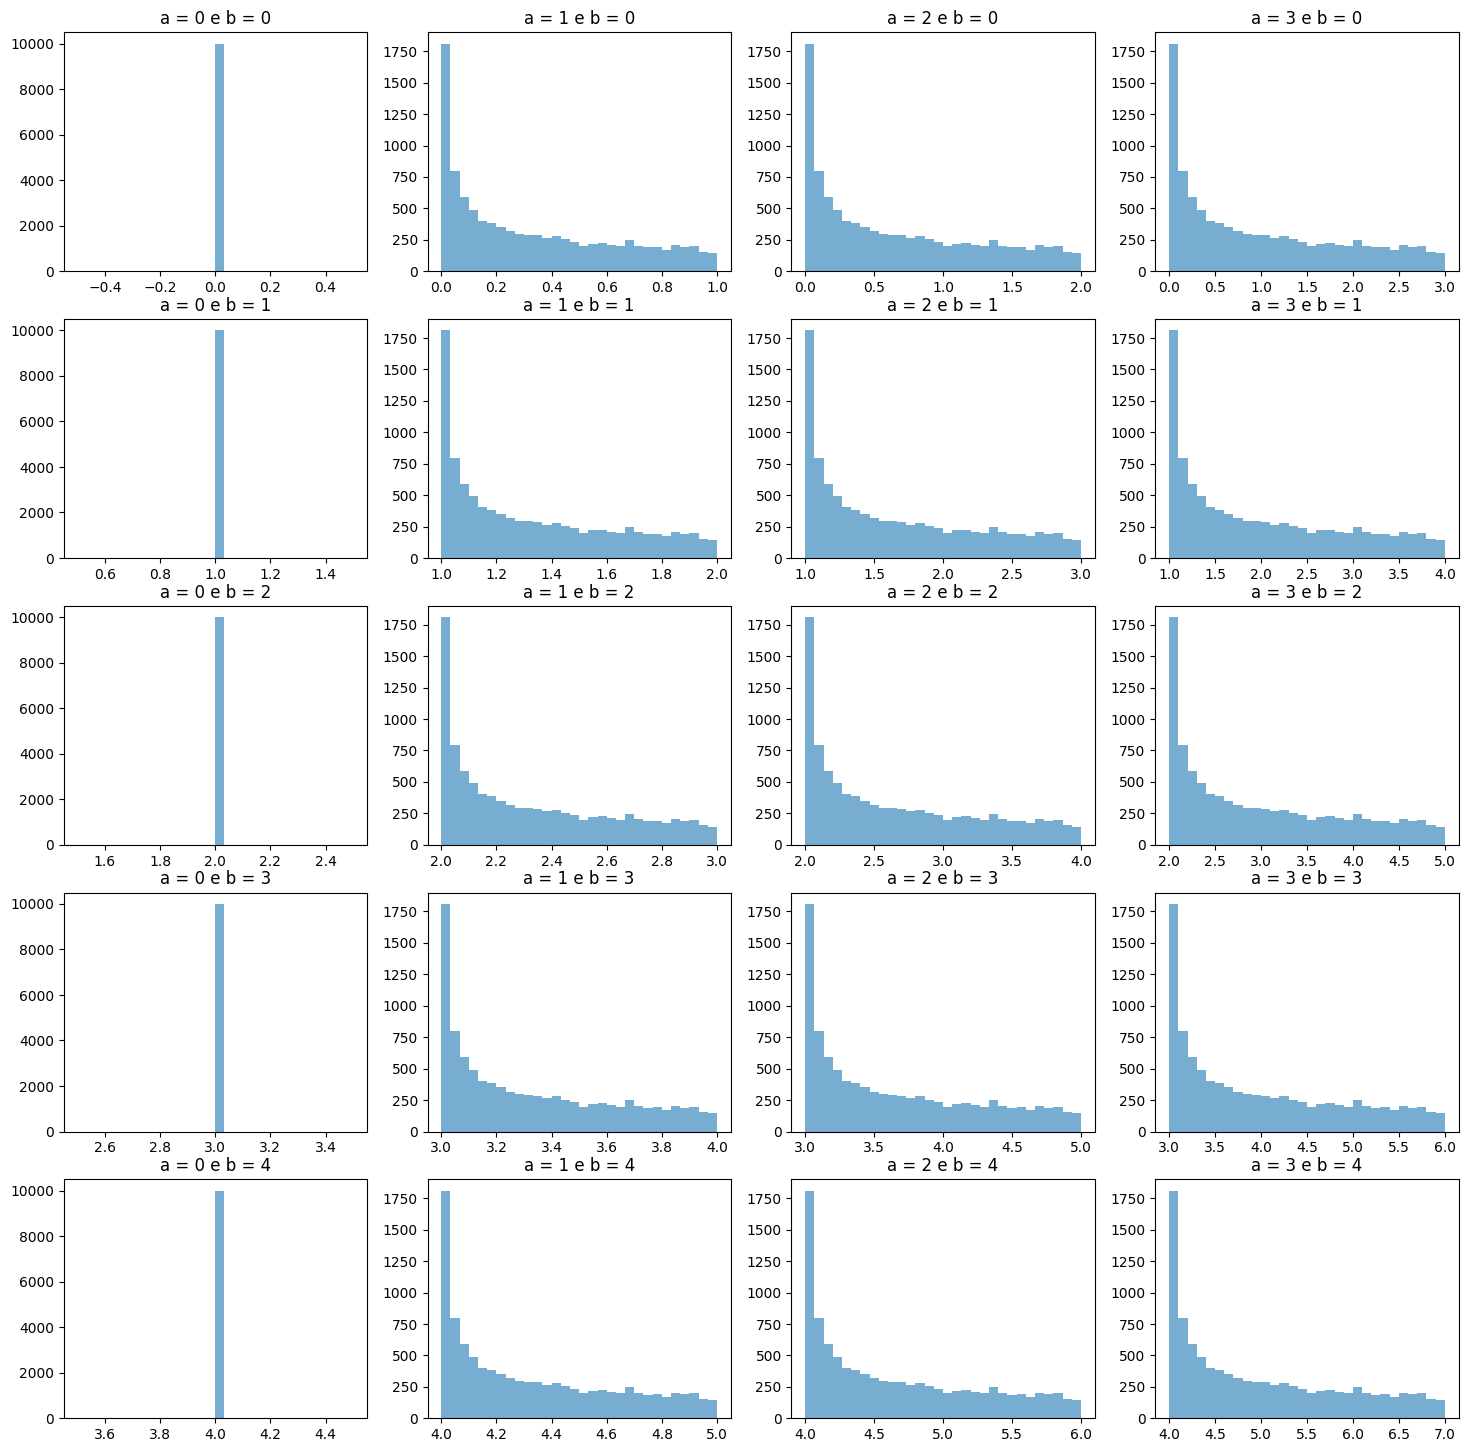

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Obtenção da variável aleatória X
size = 10000
x = stats.uniform.rvs(loc=0, scale=1, size=size, random_state=None)

#Definição dos possíveis valores de a e b
list_a = [0, 0.5, 1, 2]
list_b = [-1, 0, 1, 2, 4]

# Organização da plotagem da figura
fig, axs = plt.subplots(5, 4, figsize=(18, 18))
ax = 0
ay = 0

# Cálculo de cada y e plotagem dos gráficos
for a, i in enumerate(list_a):
  for b, j in enumerate(list_b):
    # Plotagem do histograma
    y = a * x**2 + b
    ax1 = axs[ax, ay]
    ax1.hist(y, bins=int(1+3.22*np.log(size)), alpha=0.6)
    ax1.set_title(f'a = {a} e b = {b}')

    ax += 1
  ax = 0
  ay += 1


### Parte 2) Análise de métricas

Teoricamente, cada uma das métricas pode ser encontrada da seguinte forma:

* $E[X] = \int_{a}^{b} x\cdot f(x) \,dx = \int_{a}^{b} x\cdot \frac{1}{b-a} = \frac{b+a}{2}$

* $E[Y] = c \cdot E[X^2] + d = c \cdot \frac{b^2 + ab + a^2}{3} + d$

* $E[X^2] = \int_{a}^{b} x^2\cdot \frac{1}{b-a} = \frac{a^2 + ab + b^2}{3}$

* $E[Y^2] = E[(cX^2 + d)^2] = c^2E[X^4] + 2cdE[X^2] + d^2 = c^2\frac{(b-a)^4}{5} + 2cd\frac{a^2+ab+b^2}{3} + d^2$

* $Var(X) = E[X^2] - (E[X])^2 = \frac{(b-a)^2}{12}$

* $Var(Y) = Var(aX^2 + b) = a^2Var(X^2) = a^2\cdot\{E[X^4] - (E[X^2]^2)\}$

* $σ(X) = \sqrt(Var(X))$

* $σ(Y) = \sqrt(Var(Y))$

* $Cov(X, Y) = \frac{\sum_{i=1}^{n} (x - m_x)\cdot(y-m_y)}{n}$

* $Corr(X, Y) = \frac{Cov(X, Y)}{σ(X)\cdotσ(Y)}$

In [ ]:
# Limites a e b da V.A X
dist_a = 0
dist_b = 1

list_a = [0, 0.5, 1, 2]
list_b = [-1, 0, 1, 2, 4]

for a in list_a:
  for b in list_b:
    # Definição de X e Y
    x = stats.uniform.rvs(loc=0, scale=1, size=1000, random_state=None)
    y = a * x**2 + b

    print(f'-------------a={a}, b={b}--------------')

    # Cálculos de E[X] e E[Y]
    real_mean_x = x.mean()
    theorical_mean_x = (dist_b-dist_a)/2
    real_mean_y = y.mean()
    theorical_mean_y = a * ((dist_b**2 + dist_b*dist_a + dist_a**2)/3) + b

    print(f"Valor teórico de E[X] = {theorical_mean_x:.4f}")
    print(f"Valor real de E[X] = {real_mean_x:.4f}")
    print(f"Valor teórico de E[Y] = {theorical_mean_y:.4f}")
    print(f"Valor real de E[Y] = {real_mean_y:.4f}\n")

    # Cálculos de E[X^2] e E[Y^2]
    real_ex2 = (x**2).mean()
    theorical_ex2 = (dist_a**2 + dist_a*dist_b + dist_b**2)/3
    real_ey2 = (y**2).mean()
    theorical_ey2 = a**2*(((dist_b-dist_a)**4)/5) + 2*a*b*theorical_ex2 + b**2

    print(f"Valor teórico de E[X^2] = {theorical_ex2:.4f}")
    print(f"Valor real de E[X^2] = {real_ex2:.4f}")
    print(f"Valor teórico de E[Y^2] = {theorical_ey2:.4f}")
    print(f"Valor real de E[Y^2] = {real_ey2:.4f}\n")

    # Cálculos de Var(X) e Var(Y)
    real_varx = x.var()
    theorical_varx = ((dist_b - dist_a)**2)/12
    real_vary = y.var()
    theorical_vary = a**2*((((dist_b-dist_a)**4)/5) - theorical_ex2**2)

    print(f"Valor teórico de Var(X) = {theorical_varx:.4f}")
    print(f"Valor real de Var(X) = {real_varx:.4f}")
    print(f"Valor teórico de Var(Y) = {theorical_vary:.4f}")
    print(f"Valor real de Var(Y) = {real_vary:.4f}\n")

    # Cálculos de std(x) e std(y)
    real_stdx = x.std()
    theorical_stdx = np.sqrt(theorical_varx)
    real_stdy = y.std()
    theorical_stdy = np.sqrt(theorical_vary)

    print(f"Valor teórico de std(X) = {theorical_stdx:.4f}")
    print(f"Valor real de std(X) = {real_stdx:.4f}")
    print(f"Valor teórico de std(Y) = {theorical_stdy:.4f}")
    print(f"Valor real de std(Y) = {real_stdy:.4f}\n")

    # Cálculos da covariância e correlação
    real_cov_xy = np.cov(x, y)[0,1]
    theorical_cov_xy = np.sum((x-x.mean())*(y-y.mean()))/1000
    real_corr_xy = np.corrcoef(x,y)[0,1]
    theorical_corr_xy = theorical_cov_xy/(theorical_stdx*theorical_stdy)

    print(f"Valor teórico de Cov(X, Y) = {theorical_cov_xy:.4f}")
    print(f"Valor real de Cov(X, Y) = {real_cov_xy:.4f}")
    print(f"Valor teórico de Corr(X, Y) = {theorical_corr_xy:.4f}")
    print(f"Valor real de Corr(X, Y) = {real_corr_xy:.4f}\n")

-------------a=0, b=-1--------------
Valor teórico de E[X] = 0.5000
Valor real de E[X] = 0.4868
Valor teórico de E[Y] = -1.0000
Valor real de E[Y] = -1.0000

Valor teórico de E[X^2] = 0.3333
Valor real de E[X^2] = 0.3200
Valor teórico de E[Y^2] = 1.0000
Valor real de E[Y^2] = 1.0000

Valor teórico de Var(X) = 0.0833
Valor real de Var(X) = 0.0830
Valor teórico de Var(Y) = 0.0000
Valor real de Var(Y) = 0.0000

Valor teórico de std(X) = 0.2887
Valor real de std(X) = 0.2880
Valor teórico de std(Y) = 0.0000
Valor real de std(Y) = 0.0000

Valor teórico de Cov(X, Y) = 0.0000
Valor real de Cov(X, Y) = 0.0000
Valor teórico de Corr(X, Y) = nan
Valor real de Corr(X, Y) = nan

-------------a=0, b=0--------------
Valor teórico de E[X] = 0.5000
Valor real de E[X] = 0.5208
Valor teórico de E[Y] = 0.0000
Valor real de E[Y] = 0.0000

Valor teórico de E[X^2] = 0.3333
Valor real de E[X^2] = 0.3548
Valor teórico de E[Y^2] = 0.0000
Valor real de E[Y^2] = 0.0000

Valor teórico de Var(X) = 0.0833
Valor real 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-16-49981620bc89>:64: RuntimeWarning: invalid value encountered in double_scalars
  theorical_corr_xy = theorical_cov_xy/(theorical_stdx*theorical_stdy)
